In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [12]:
data = pd.read_csv('../data/train.csv')
data.sort_values('timestamp', inplace=True, ascending=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617679 entries, 2563872 to 1061888
Data columns (total 4 columns):
KPI ID       object
timestamp    int64
value        float64
label        int64
dtypes: float64(1), int64(2), object(1)
memory usage: 99.9+ MB


In [14]:
data.head()

,KPI ID,timestamp,value,label
2563872,07927a9a18fa19ae,1467302400,0.197575,0
2563873,07927a9a18fa19ae,1467302700,0.149877,0
2563874,07927a9a18fa19ae,1467303000,0.078893,0
2563875,07927a9a18fa19ae,1467303300,0.012004,0
2563876,07927a9a18fa19ae,1467303600,-0.022222,0


In [15]:
kpi_set = list(set(data["KPI ID"]))

In [16]:
print(len(kpi_set))

27


In [36]:
kpi_1_data = data[data["KPI ID"] == "88cf3a776ba00e7c"]

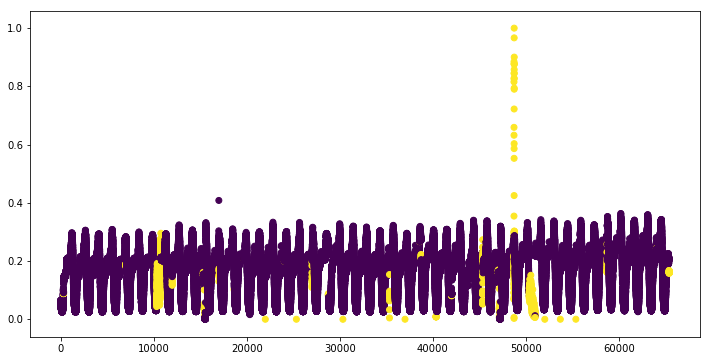

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(kpi_1_data)), kpi_1_data.value.values, c=kpi_1_data.label)
# plt.xlim([0, 3000])
plt.show()

046ec29ddf80d62e: 8784


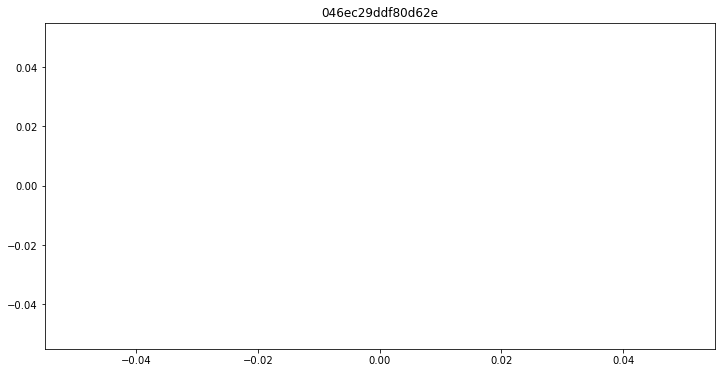

09513ae3e75778a3: 131785


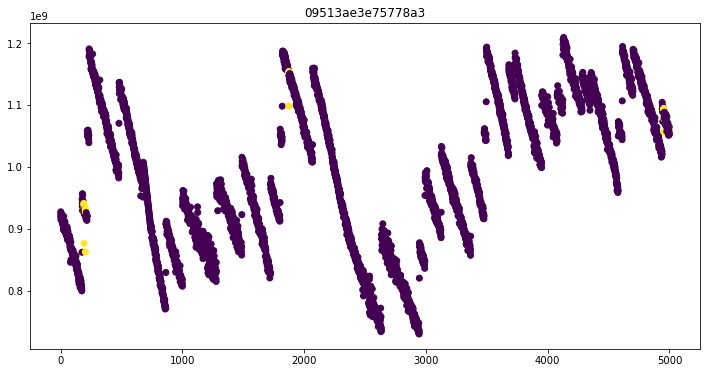

da403e4e3f87c9e0: 131790


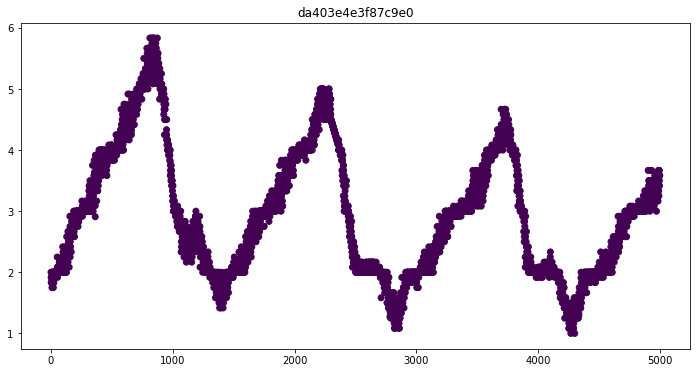

e5e3cd1a03fee6bd: 108891


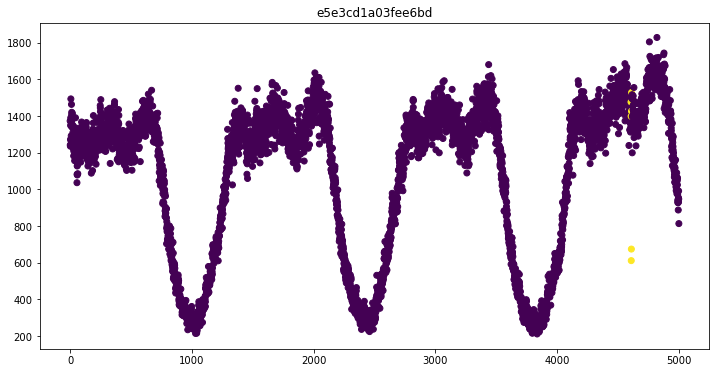

88cf3a776ba00e7c: 65436


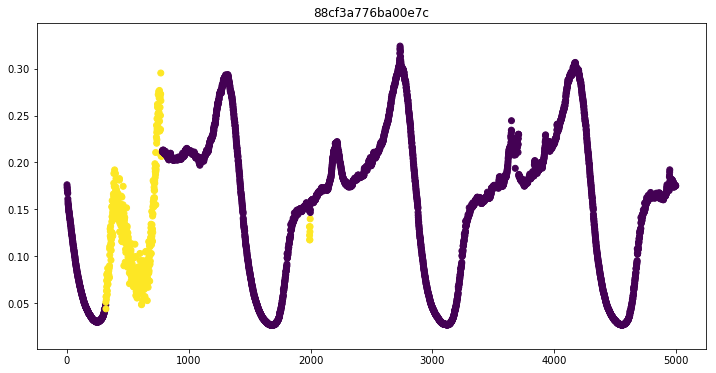

a40b1df87e3f1c87: 137925


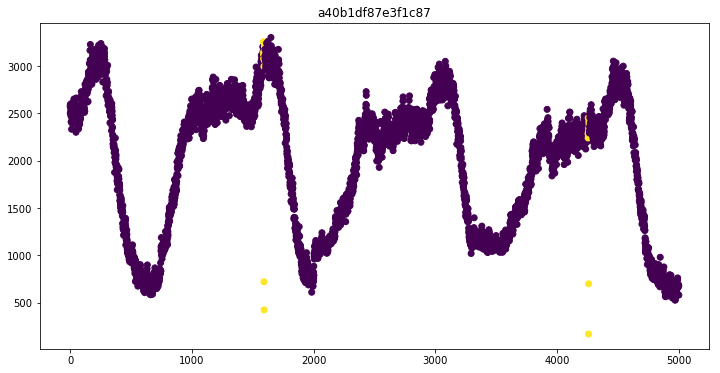

54e8a140f6237526: 8248


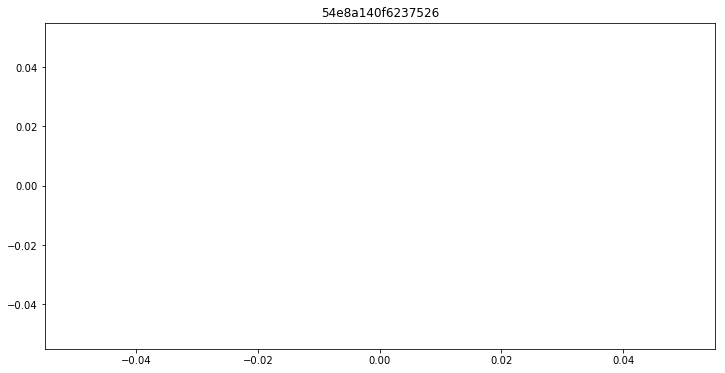

8c892e5525f3e491: 147009


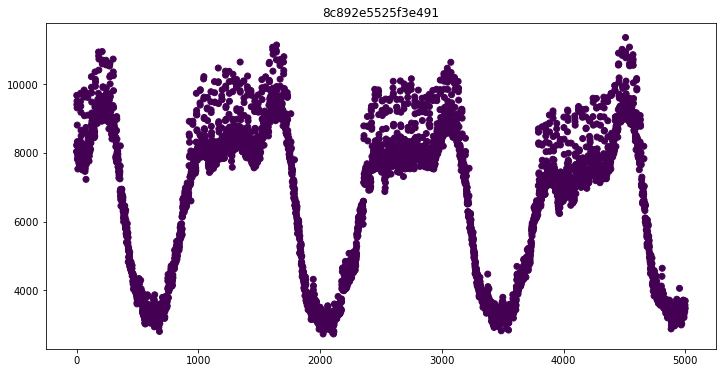

9ee5879409dccef9: 65449


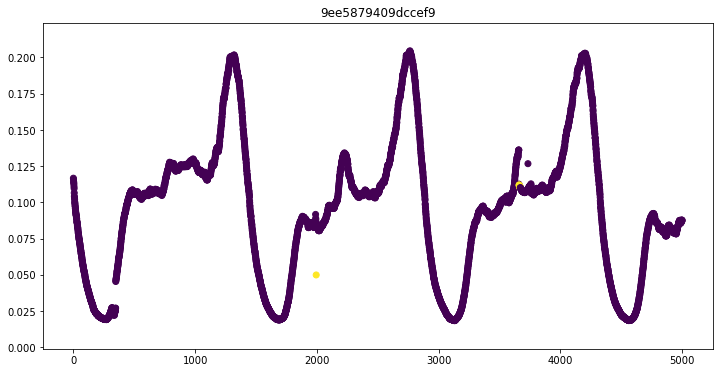

a5bf5d65261d859a: 131790


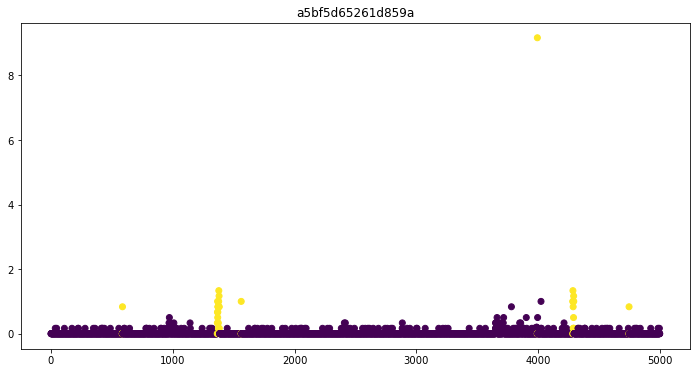

76f4550c43334374: 8784


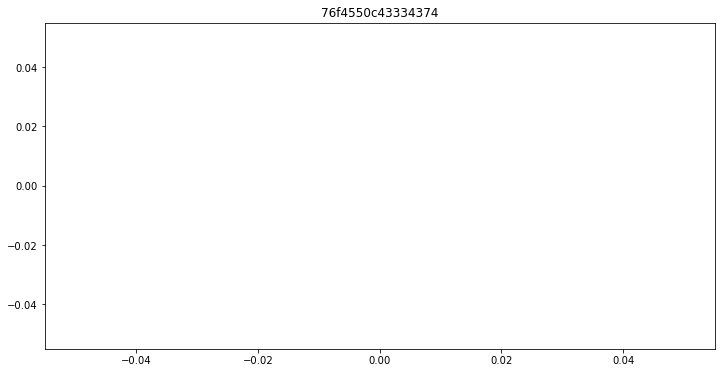

18fbb1d5a5dc099d: 131795


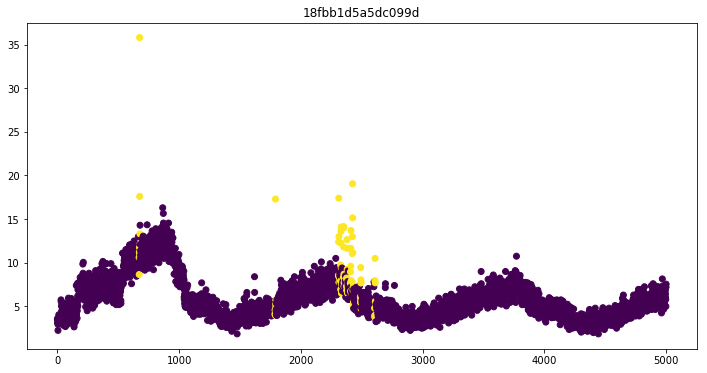

9bd90500bfd11edb: 131795


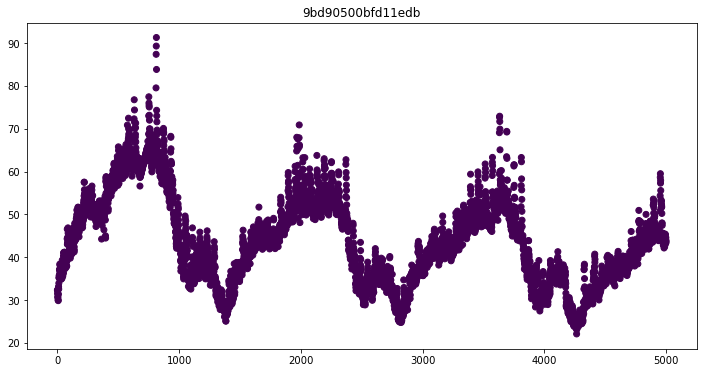

769894baefea4e9e: 8784


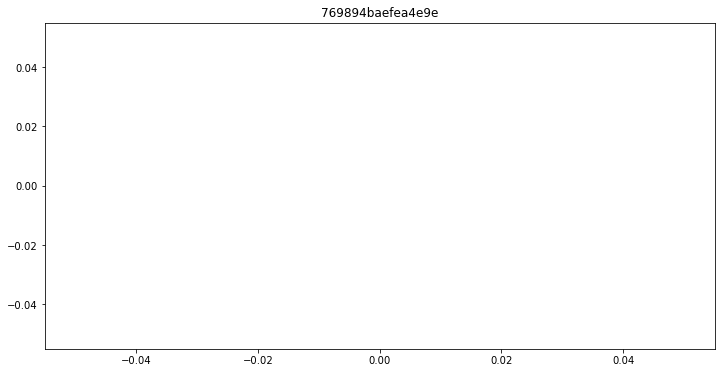

8a20c229e9860d0c: 8784


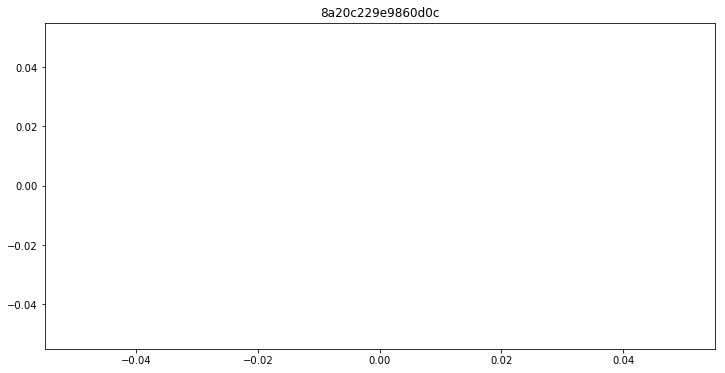

c58bfcbacb2822d1: 131790


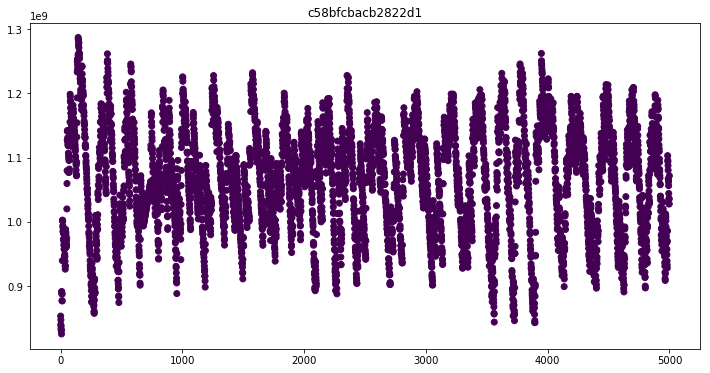

cff6d3c01e6a6bfa: 147629


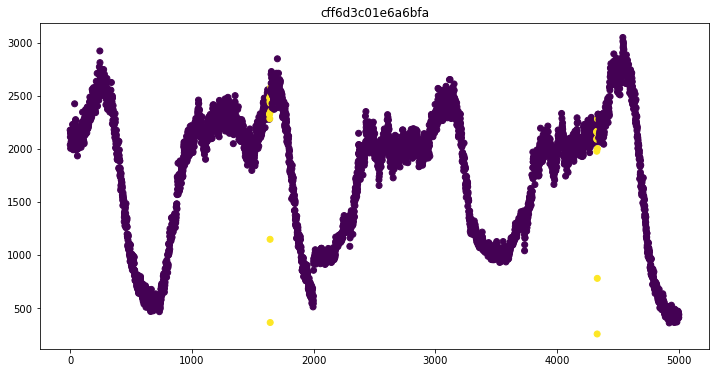

71595dd7171f4540: 147668


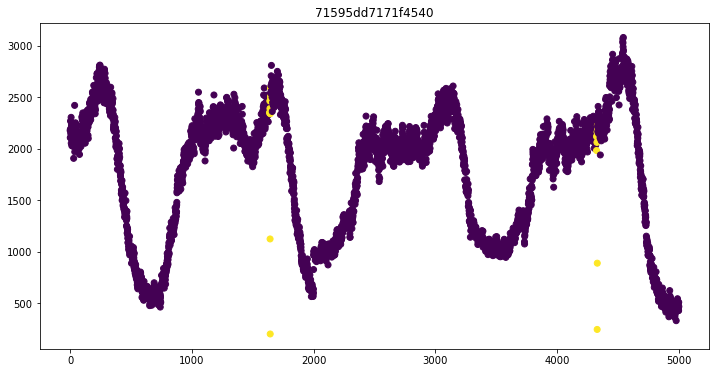

07927a9a18fa19ae: 10960


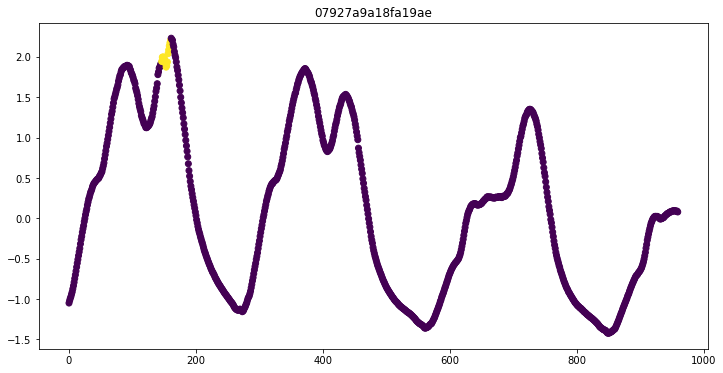

e0770391decc44ce: 147024


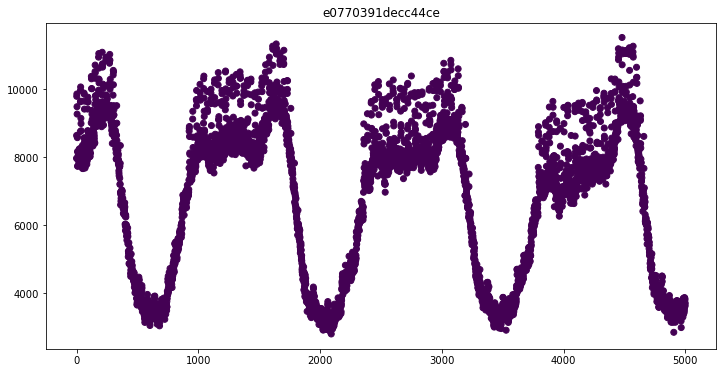

40e25005ff8992bd: 108900


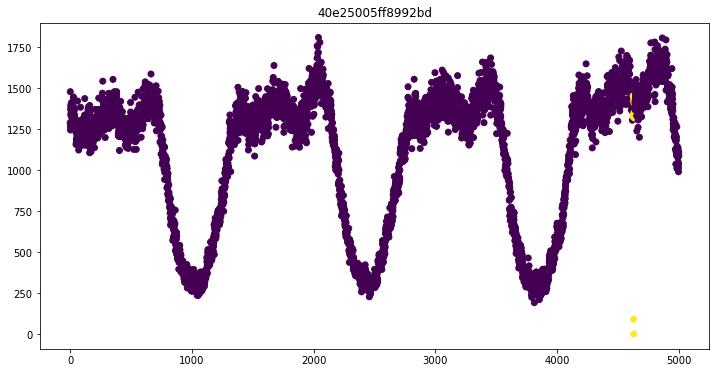

1c35dbf57f55f5e4: 131795


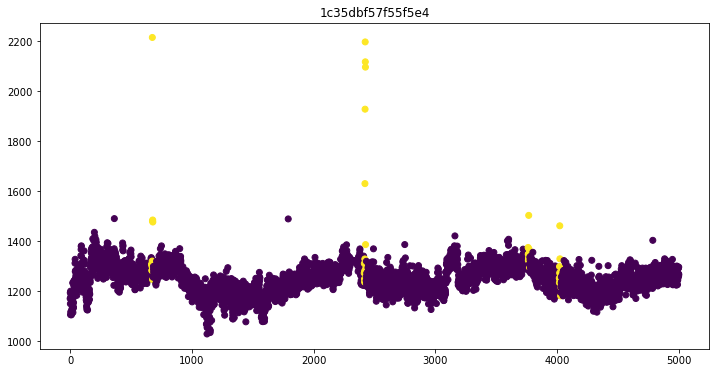

7c189dd36f048a6c: 147689


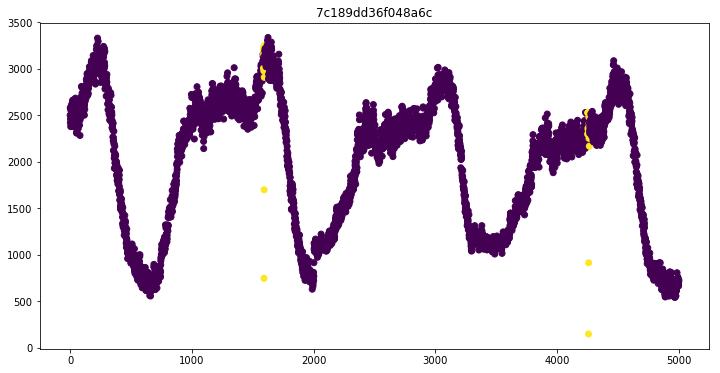

02e99bd4f6cfb33f: 131795


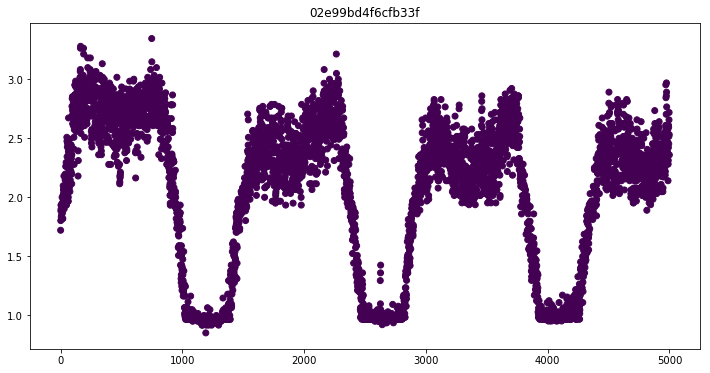

affb01ca2b4f0b45: 147680


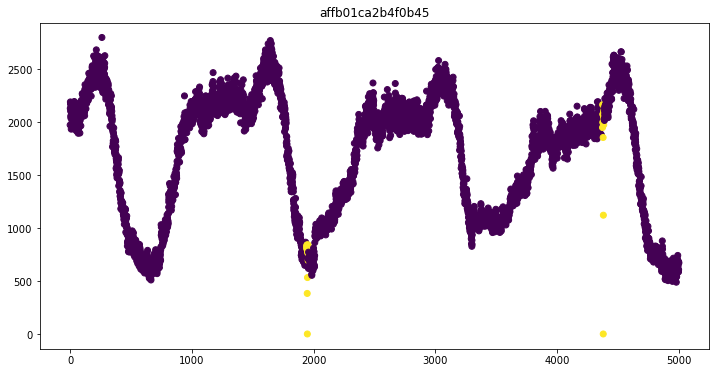

8bef9af9a922e0b3: 129453


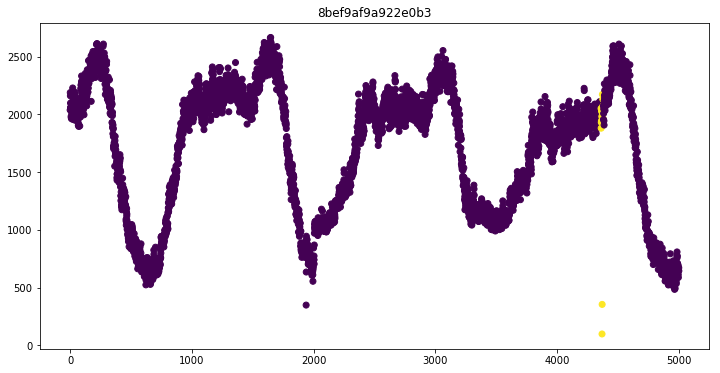

b3b2e6d1a791d63a: 8247


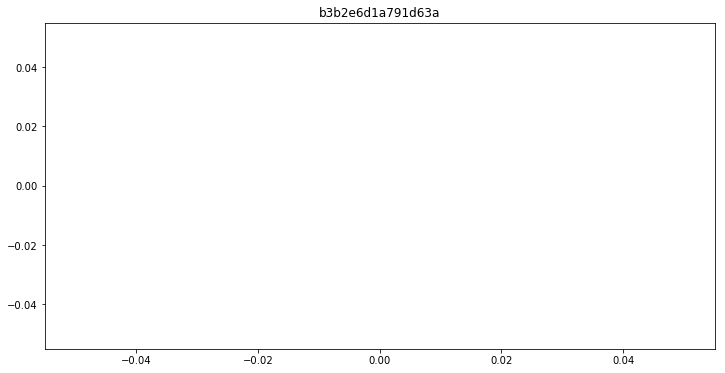

In [35]:
for k in kpi_set:
    tmp = data[data["KPI ID"] == k]
    print("{0}: {1}".format(k, len(tmp)))
    tmp = tmp.iloc[10000:15000]
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(tmp)), tmp.value.values, c=tmp.label)
    plt.title(k)
    plt.show()
    print

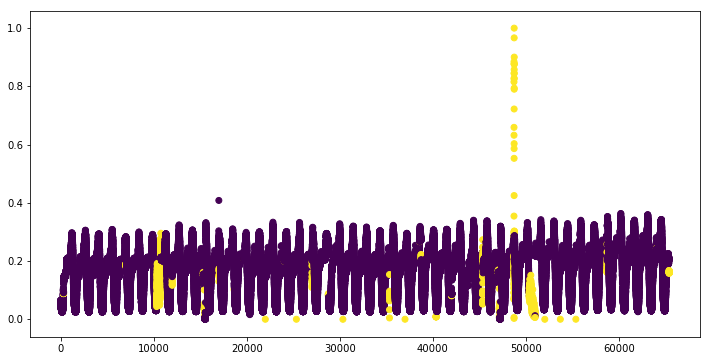

In [60]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(kpi_1_data)), kpi_1_data.value.values, c=kpi_1_data.label)
plt.show()

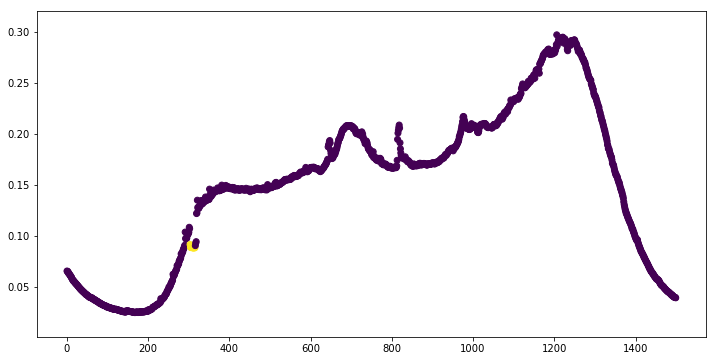

In [61]:
aa = kpi_1_data.copy()
aa = aa.iloc[0:1500]
plt.figure(figsize=(12, 6))
plt.scatter(range(len(aa)), aa.value.values, c=aa.label)
plt.show()

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [101]:
kpi_1_data.headdad()

,KPI ID,timestamp,value,label
1926905,88cf3a776ba00e7c,1492967340,0.065692,0
1926906,88cf3a776ba00e7c,1492967400,0.065182,0
1926907,88cf3a776ba00e7c,1492967460,0.065241,0
1926908,88cf3a776ba00e7c,1492967520,0.063808,0
1926909,88cf3a776ba00e7c,1492967580,0.063742,0


In [249]:
v = kpi_1_data.iloc[:, 2:4]
v = v[['label', 'value']]
timesteps = 1440
reframed = series_to_supervised(v.values, timesteps, 1)
reframed.head()

,var1(t-1440),var2(t-1440),var1(t-1439),var2(t-1439),var1(t-1438),var2(t-1438),var1(t-1437),var2(t-1437),var1(t-1436),var2(t-1436),...,var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
1440,0.0,0.065692,0.0,0.065182,0.0,0.065241,0.0,0.063808,0.0,0.063742,...,0.0,0.067570,0.0,0.066540,0.0,0.065407,0.0,0.065259,0.0,0.064584
1441,0.0,0.065182,0.0,0.065241,0.0,0.063808,0.0,0.063742,0.0,0.063174,...,0.0,0.066540,0.0,0.065407,0.0,0.065259,0.0,0.064584,0.0,0.063816
1442,0.0,0.065241,0.0,0.063808,0.0,0.063742,0.0,0.063174,0.0,0.062384,...,0.0,0.065407,0.0,0.065259,0.0,0.064584,0.0,0.063816,0.0,0.063702
1443,0.0,0.063808,0.0,0.063742,0.0,0.063174,0.0,0.062384,0.0,0.061820,...,0.0,0.065259,0.0,0.064584,0.0,0.063816,0.0,0.063702,0.0,0.062730
1444,0.0,0.063742,0.0,0.063174,0.0,0.062384,0.0,0.061820,0.0,0.061266,...,0.0,0.064584,0.0,0.063816,0.0,0.063702,0.0,0.062730,0.0,0.062460


In [250]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[-1:], axis=1, inplace=True)
reframed.head()

,var1(t-1440),var2(t-1440),var1(t-1439),var2(t-1439),var1(t-1438),var2(t-1438),var1(t-1437),var2(t-1437),var1(t-1436),var2(t-1436),...,var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t)
1440,0.0,0.065692,0.0,0.065182,0.0,0.065241,0.0,0.063808,0.0,0.063742,...,0.067902,0.0,0.067570,0.0,0.066540,0.0,0.065407,0.0,0.065259,0.0
1441,0.0,0.065182,0.0,0.065241,0.0,0.063808,0.0,0.063742,0.0,0.063174,...,0.067570,0.0,0.066540,0.0,0.065407,0.0,0.065259,0.0,0.064584,0.0
1442,0.0,0.065241,0.0,0.063808,0.0,0.063742,0.0,0.063174,0.0,0.062384,...,0.066540,0.0,0.065407,0.0,0.065259,0.0,0.064584,0.0,0.063816,0.0
1443,0.0,0.063808,0.0,0.063742,0.0,0.063174,0.0,0.062384,0.0,0.061820,...,0.065407,0.0,0.065259,0.0,0.064584,0.0,0.063816,0.0,0.063702,0.0
1444,0.0,0.063742,0.0,0.063174,0.0,0.062384,0.0,0.061820,0.0,0.061266,...,0.065259,0.0,0.064584,0.0,0.063816,0.0,0.063702,0.0,0.062730,0.0


In [251]:
values = reframed.values
n_train_hours = 52000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], timesteps, 2))
test_X = test_X.reshape((test_X.shape[0], timesteps, 2))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(52000, 1440, 2) (52000,) (11996, 1440, 2) (11996,)


In [252]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [253]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse',  metrics=['acc'], optimizer='adam')

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=72, validation_data=(test_X, test_y), verbose=1, shuffle=False)

Train on 52000 samples, validate on 11996 samples
Epoch 1/10
18000/52000 [=========>....................] - ETA: 1336s - loss: 0.0084 - acc: 0.9856

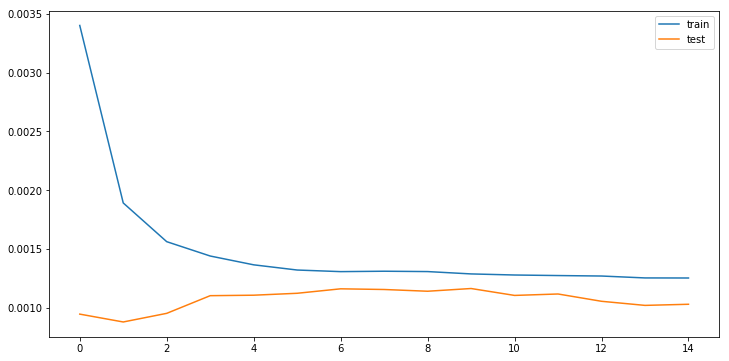

In [243]:
# plot history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

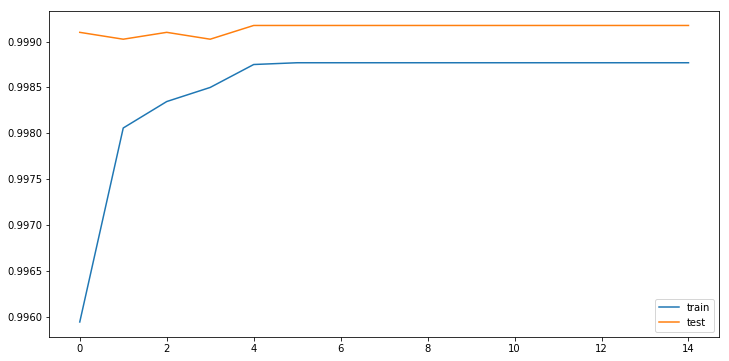

In [244]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

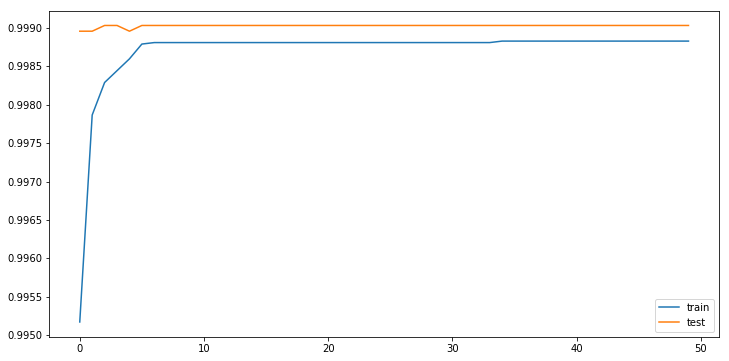

In [209]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [245]:
p = model.predict_classes(test_X).ravel()

13344/13346 [============================>.] - ETA: 0s

In [173]:
from sklearn import metrics

In [246]:
print(metrics.classification_report(test_y, p))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     13267
        1.0       0.94      0.92      0.93        79

avg / total       1.00      1.00      1.00     13346



In [212]:
print(metrics.classification_report(test_y, p))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     13326
        1.0       0.92      0.91      0.92        80

avg / total       1.00      1.00      1.00     13406



In [227]:
d = pd.DataFrame({"ture": test_y, "pred": p})
d.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
pred,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ture,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [228]:
from evaluation import get_range_proba

0.93827160493827155

In [247]:
y_true_list = []
y_pred_list = []

y_pred = get_range_proba(p, test_y, delay=7)
y_true = test_y

y_true_list.append(y_true)
y_pred_list.append(y_pred)

In [248]:
fscore = metrics.f1_score(np.concatenate(y_true_list), np.concatenate(y_pred_list))
fscore

0.94999999999999996